In [2]:
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
file_path = 'processed.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()

,Unnamed: 0,title,categoryName,website,url,reviewsCount,stars,text,latitude,longitude
0,0,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist...,3349,5.0,"One word amazing!! The red fish, halibut, fr...",33.779814,-84.410451
1,1,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist...,3349,5.0,First time here and the food is great and the ...,33.779814,-84.410451
2,2,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist...,3349,5.0,I recently had the pleasure of dining at Optim...,33.779814,-84.410451
3,3,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist...,3349,5.0,Beautiful atmosphere and delicious food. All o...,33.779814,-84.410451
4,4,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist...,3349,5.0,We had a wonderful dinner at the Optimist. Our...,33.779814,-84.410451


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rohit\AppData\Local\Temp\ipykernel_2124\606687753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


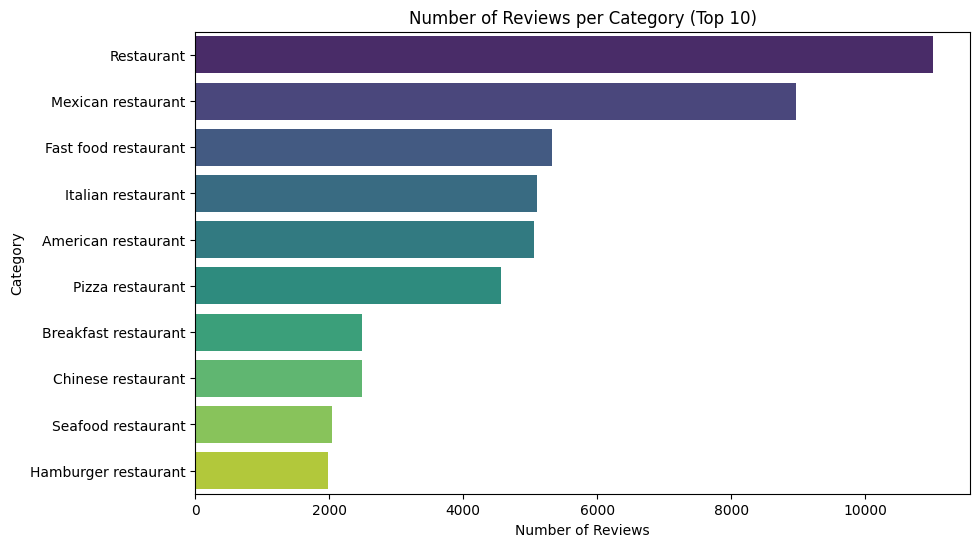

In [8]:
category_counts = df['categoryName'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Number of Reviews per Category (Top 10)')
plt.xlabel('Number of Reviews')
plt.ylabel('Category')
plt.gca().set_facecolor('none')
plt.savefig('/category_reviews_transparent.png', bbox_inches='tight', transparent=True)
plt.show()

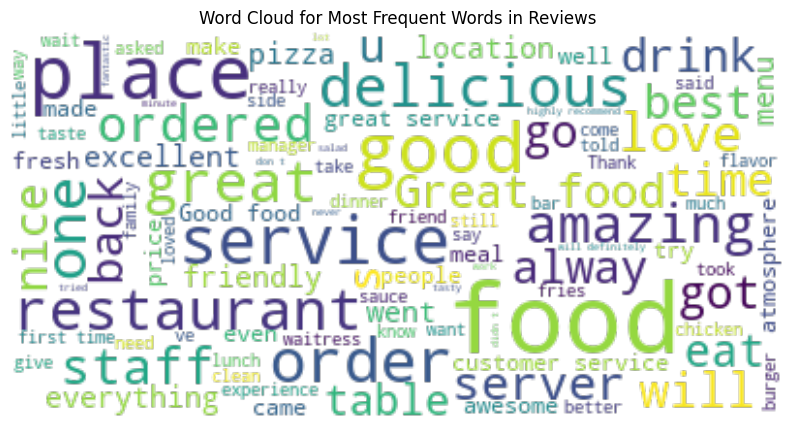

In [10]:
from wordcloud import WordCloud

text = ' '.join(review for review in df.text.dropna())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

wordcloud_transparent = WordCloud(max_font_size=50, max_words=100, background_color=None, mode="RGBA").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_transparent, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Most Frequent Words in Reviews')
plt.savefig('/wordcloud.png', bbox_inches='tight', transparent=True)
plt.show()